In [24]:
import random
import numpy as np
from PIL import Image
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split, WeightedRandomSampler, SubsetRandomSampler
from torchvision.transforms import Compose, ToPILImage, ToTensor, Normalize, RandomHorizontalFlip, Resize
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import numpy as np

def generate_dataset(img_size, n_images, binary=True, seed=None):
    if seed is not None:
        np.random.seed(seed)
    images = np.random.rand(n_images, img_size, img_size)
    if binary:
        images = (images > 0.5).astype(int)
    labels = np.random.randint(0, 2, n_images)
    return images, labels

# Now you can call the function
images, labels = generate_dataset(img_size=5, n_images=300, binary=True, seed=13)


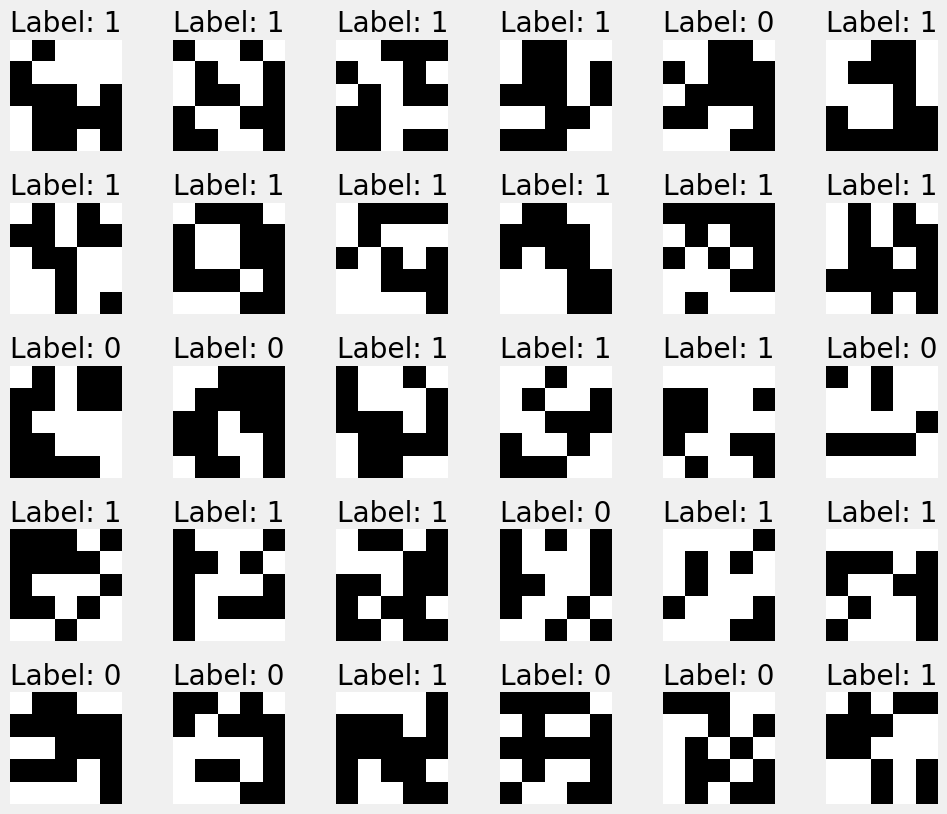

In [23]:
import matplotlib.pyplot as plt

def plot_images(images, labels, n_plot=30):
    plt.figure(figsize=(10, 10))
    for i in range(n_plot):
        plt.subplot(6, 6, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Now you can call the function
fig = plot_images(images, labels, n_plot=30)


In [22]:
images_r = np.zeros((5, 5), dtype=np.uint8)
print(images_r)
images_r[:, 0] = 255
print(images_r)
images_r[:, 1] = 128
print(images_r)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[255   0   0   0   0]
 [255   0   0   0   0]
 [255   0   0   0   0]
 [255   0   0   0   0]
 [255   0   0   0   0]]
[[255 128   0   0   0]
 [255 128   0   0   0]
 [255 128   0   0   0]
 [255 128   0   0   0]
 [255 128   0   0   0]]


In [20]:
images_g = np.zeros((5, 5), dtype=np.uint8)
print(images_g)
images_g[:, 1] = 128
print(images_g)
images_g[:, 2] = 255
print(images_g)
images_g[:, 3] = 128
print(images_g)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[  0 128   0   0   0]
 [  0 128   0   0   0]
 [  0 128   0   0   0]
 [  0 128   0   0   0]
 [  0 128   0   0   0]]
[[  0 128 255   0   0]
 [  0 128 255   0   0]
 [  0 128 255   0   0]
 [  0 128 255   0   0]
 [  0 128 255   0   0]]
[[  0 128 255 128   0]
 [  0 128 255 128   0]
 [  0 128 255 128   0]
 [  0 128 255 128   0]
 [  0 128 255 128   0]]


In [19]:
images_b = np.zeros((5, 5), dtype=np.uint8)
images_b[:, 3] = 128
print(images_b)
images_b[:, 4] = 255
print(images_b)

[[  0   0   0 128   0]
 [  0   0   0 128   0]
 [  0   0   0 128   0]
 [  0   0   0 128   0]
 [  0   0   0 128   0]]
[[  0   0   0 128 255]
 [  0   0   0 128 255]
 [  0   0   0 128 255]
 [  0   0   0 128 255]
 [  0   0   0 128 255]]


In [25]:
images_gray = 0.2126 * images_r + 0.7152 * images_g + 0.0722 * images_b
print(images_gray)

[[ 54.213  118.7584 182.376  100.7872  18.411 ]
 [ 54.213  118.7584 182.376  100.7872  18.411 ]
 [ 54.213  118.7584 182.376  100.7872  18.411 ]
 [ 54.213  118.7584 182.376  100.7872  18.411 ]
 [ 54.213  118.7584 182.376  100.7872  18.411 ]]


In [32]:
image_rgb = np.stack([images_r, images_g, images_b], axis=2)
image_rgb

array([[[255,   0,   0],
        [128, 128,   0],
        [  0, 255,   0],
        [  0, 128, 128],
        [  0,   0, 255]],

       [[255,   0,   0],
        [128, 128,   0],
        [  0, 255,   0],
        [  0, 128, 128],
        [  0,   0, 255]],

       [[255,   0,   0],
        [128, 128,   0],
        [  0, 255,   0],
        [  0, 128, 128],
        [  0,   0, 255]],

       [[255,   0,   0],
        [128, 128,   0],
        [  0, 255,   0],
        [  0, 128, 128],
        [  0,   0, 255]],

       [[255,   0,   0],
        [128, 128,   0],
        [  0, 255,   0],
        [  0, 128, 128],
        [  0,   0, 255]]], dtype=uint8)

In [8]:
images.shape

(300, 5, 5)

In [10]:
examples = images[7]
examples

array([[1, 0, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0]])

In [15]:
examples_img = ToPILImage()(examples)
print(type(examples_img))

<class 'PIL.Image.Image'>


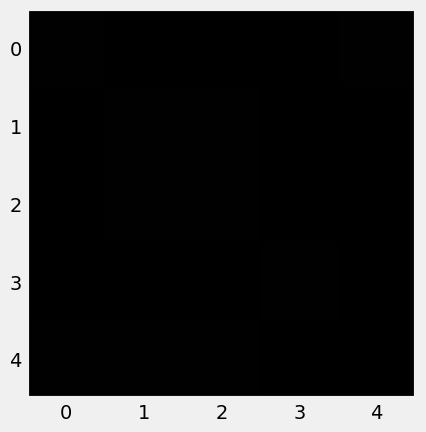

In [17]:
plt.imshow(examples_img, cmap='gray')
plt.grid(False)